### Fetching Weather Forecast details using openweathermap api 
author: Dheeraj

python : 3.6

In [405]:
import requests
import datetime
import numpy as np
import matplotlib.pyplot as plt

#### The method to extract the temperature forecast for the next 8 days
This will return the Min, Max, Day, Night, Evening temperature forecast

In [406]:
def extract_temp(data):
    date = [] # to hold the dates for the forecasted days
    i = 0
    temperature = np.zeros((len(data['daily'][0]['temp']),len(data['daily']))) # numpy array to hold all the forecast temp
    for record in data['daily']:
        for count,value in enumerate(record['temp'].values()):
            temperature[count][i] = value
        i = i +1
        day = datetime.datetime.fromtimestamp(int(record['dt'])).strftime('%Y-%m-%d') # converting epoch unix datetime standard
        date.append(day)
    return temperature, date


#### This method returns the weather parameters
1. On method call , parameters can be set to extract only the required parameters
2. The default value for all the parameters is set to true
3. The method returns forecated data for all the parameters set as true

In [407]:
def extract_weather_parameters(data,humidity=True,dew_point=True,wind_speed=True):
    weather_params = {"humidity":[],"dew":[],"wind_speed":[]}
    date = []
    for record in data['daily']:
        if humidity:
            weather_params["humidity"].append(record['humidity'])
        if dew_point:
            weather_params["dew"].append(record['dew_point'])
        if wind_speed:
            weather_params["wind_speed"].append(record['wind_speed'])
            
        day = datetime.datetime.fromtimestamp(int(record['dt'])).strftime('%Y-%m-%d')
        date.append(day)
    return weather_params, date

#### This method allows the user to plot the graph based on the given paramters.
1. Takes the Y axis values to be plotted against the forecast dates
2. Takes the labels as well to allow the legends on graph

In [408]:
def plot_graph(plt,y_axis,label=None,marker=".",markersize=12):
    plt.plot(y_axis,label=label,marker=marker, markersize=markersize)

#### This methods allows to display the plot with inputs as x and y labels

In [409]:
def display_plot(plt,date,xlabel,ylabel):
    plt.xticks(ticks = range(len(date)),labels=date, rotation =70)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f'{ylabel} & {xlabel}')
    plt.legend()
    plt.show()

### Plot for the temperature forecast

In [410]:
def plot_temperature(data):
    temperature,date = extract_temp(data)
    plt.figure(figsize=(10,8))
    for temp_data in zip(data['daily'][0]['temp'],temperature):
        plot_graph(plt,temp_data[1],label=temp_data[0])

    display_plot(plt,date,"Date","Temperatue")

### Plot for the other weather parameters (humidity,dew, wind Speed)

In [411]:
def plot_weather_params(data, humidity=True,dew_point=True,wind_speed=True):
    weather_params,date = extract_weather_parameters(data, humidity=humidity,dew_point=dew_point,wind_speed=wind_speed)
    plt.figure(figsize=(10,8))
    X = np.arange(len(date))
    for label,content in weather_params.items():
        if content:
            plot_graph(plt,content,label)
            plt.bar(X, content, 0.25 )

    display_plot(plt,date,"Date","Parameters")

## The call to API to display the plots

#### Creating the POST with latitute and longitude of the location.
1. Enter the latitude of the location
2. Enter the longitude of the location

For temperature in Fahrenheit and wind speed in miles/hour, use units=imperial
For temperature in Celsius and wind speed in meter/sec, use units=metric
Temperature in Kelvin and wind speed in meter/sec is used by default, so there is no need to use the units parameter in the API call if you want this

Enter the Latitude: 12.9716
Enter the Longitude: 77.594


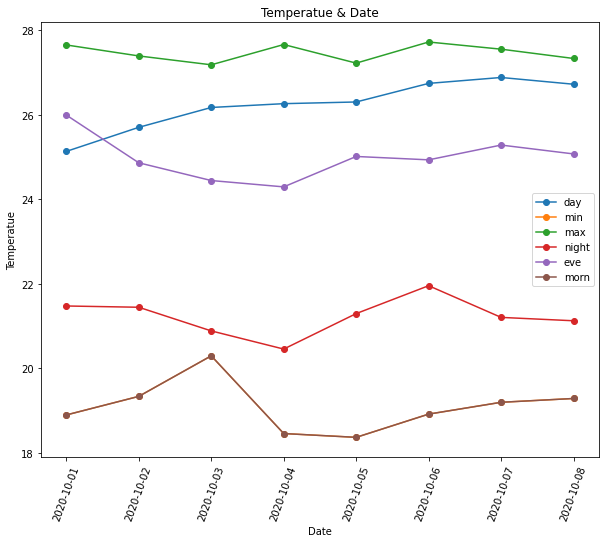

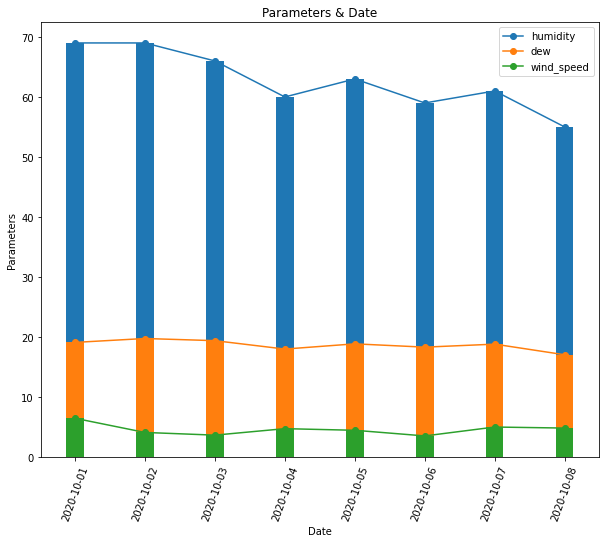

In [412]:
#Post Parameters
try:
    latitude = float(input("Enter the Latitude: ")) #12.9716 , for bangalore
    longitude= float(input("Enter the Longitude: ")) #77.594
except ValueError:
    print("Enter correct values")
    
# forming the api url
url = "https://api.openweathermap.org/data/2.5/onecall"
exclude = "hourly,current,minutely,alerts" # excludes these details from the response body
units="metric" # defines the metric in which the values are returned
appid="ce6fda9a164e8d2a231fb9e8788c421a" # openweathermap api

api = f'{url}?lat={latitude}&lon={longitude}&exclude={exclude}&appid={appid}&units={units}'
data = requests.get(api).json()
plot_temperature(data)
plot_weather_params(data)